In [0]:
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/data"

badminton  basketball  chess	football  ice_hockey
baseball   boxing      fencing	hockey


In [0]:
folder = 'data'
file = 'badminton'

In [0]:
folder = 'data'
file = 'baseball'

In [0]:
folder = 'data'
file = 'basketball'

In [0]:
folder = 'data'
file = 'boxing'

In [0]:
folder = 'data'
file = 'chess'

In [0]:
folder = 'data'
file = 'fencing'

In [0]:
folder = 'data'
file = 'football'

In [0]:
folder = 'data'
file = 'hockey'

In [0]:
folder = 'data'
file = 'ice_hockey'

In [0]:
path = Path('drive/My Drive/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('drive/My Drive/data/boxing'),
 PosixPath('drive/My Drive/data/baseball'),
 PosixPath('drive/My Drive/data/football'),
 PosixPath('drive/My Drive/data/hockey'),
 PosixPath('drive/My Drive/data/badminton'),
 PosixPath('drive/My Drive/data/chess'),
 PosixPath('drive/My Drive/data/fencing'),
 PosixPath('drive/My Drive/data/ice_hockey'),
 PosixPath('drive/My Drive/data/basketball'),
 PosixPath('drive/My Drive/data/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/data/data')]

In [0]:
classes = ['boxing','baseball','badminton','football','hockey','chess','fencing','ice_hockey','basketball']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

boxing


baseball


badminton


football


hockey


chess


fencing


ice_hockey


basketball


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'fencing',
 'football',
 'hockey',
 'ice_hockey']

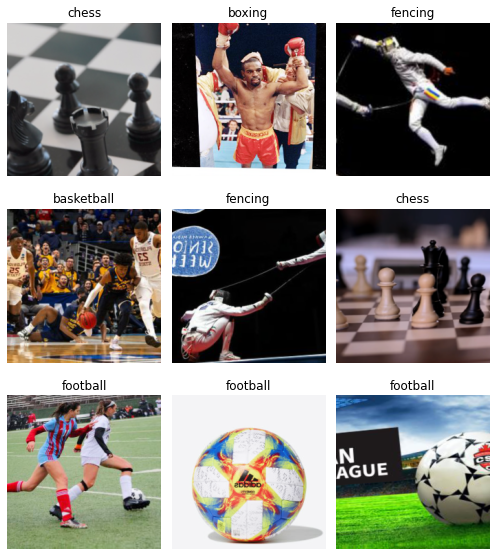

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['badminton',
  'baseball',
  'basketball',
  'boxing',
  'chess',
  'fencing',
  'football',
  'hockey',
  'ice_hockey'],
 9,
 2045,
 511)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.172891,0.287757,0.906067,00:34
1,0.613244,0.260622,0.927593,00:33
2,0.419710,0.239726,0.927593,00:33
3,0.303045,0.200486,0.931507,00:33
4,0.223556,0.217167,0.937378,00:34
5,0.173454,0.191693,0.939335,00:33
6,0.132918,0.169432,0.943249,00:33
7,0.107948,0.167655,0.945205,00:33
8,0.084829,0.171455,0.945205,00:32
9,0.077075,0.175473,0.947162,00:33


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

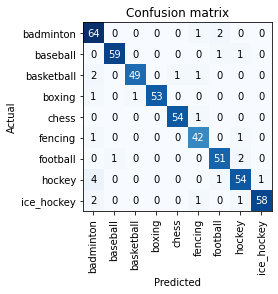

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()